In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as missing
import warnings
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


warnings.filterwarnings('ignore')

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", sns.__version__)   

df1 = pd.read_csv("Mostlytransformed.csv", index_col=0)
df2 = pd.read_csv("Five Point Test/eindtoets.csv", sep=';', index_col=0)

print(df1.shape)
print(df2.shape)



scikit-learn version: 1.3.1
pandas version: 2.1.1
seaborn version: 0.13.0
(179638, 9)
(1765, 8)


In [ ]:
df1

,timestamp,numbercl,patternsm,statuscl,timestampcl,timestampload,timestampsm,timeintest,score
idll_vo3lv,,,,,,,,,
1,2020-03-09 09:32:32,"3,7","0,0,1,0,0,0,1,0","1,1","1583742751461,1583742751869",1583742749790,2520,2520,6
1,2020-03-09 09:32:35,"2,1","1,1,0,0,0,0,0,0","1,1","1583742753766,1583742754238",1583742752391,2576,5096,6
1,2020-03-09 09:32:37,"3,4","0,0,1,1,0,0,0,0","1,1","1583742756412,1583742756876",1583742755058,2541,7637,6
1,2020-03-09 09:32:40,"8,6","0,0,0,0,0,1,0,1","1,1","1583742759029,1583742759476",1583742757674,2540,10177,6
1,2020-03-09 09:32:42,"4,3","0,0,1,1,0,0,0,0","1,1","1583742761381,1583742762222",1583742760309,2384,12561,6
...,...,...,...,...,...,...,...,...,...
10058,2020-12-04 12:15:48,"1,6","1,0,0,0,0,1,0,0","1,1","1607080545280,1607080545718",1607080544256,2170,172562,51
10058,2020-12-04 12:15:51,"1,5","1,0,0,0,1,0,0,0","1,1","1607080547519,1607080548139",1607080546777,2113,174675,51
10058,2020-12-04 12:15:53,"3,8","0,0,1,0,0,0,0,1","1,1","1607080549806,1607080550351",1607080549305,1529,176204,51


In [ ]:
df2

,schooljaar,standaardscore,ond_opgaves8000,ond_percgoed8000,ond_opgaves8001,ond_percgoed8001,ond_opgaves8002,ond_percgoed8002
idll_vo3lv,,,,,,,,
6730,2016-2017,537,106,78.5,54,63.5,56.0,62.2
4859,2016-2017,515,50,37.0,39,45.9,50.0,55.6
5543,2016-2017,541,111,82.2,62,72.9,NaN,NaN
3328,2016-2017,530,69,51.1,69,81.2,41.0,45.6
2649,2016-2017,519,81,60.0,20,23.5,55.0,61.1
...,...,...,...,...,...,...,...,...
496,2016-2017,529,89,65.9,46,54.1,52.0,57.8
7082,2016-2017,535,88,65.2,65,76.5,57.0,63.3
4723,2016-2017,525,79,58.5,44,51.8,56.0,62.2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765 entries, 6730 to 6221
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   schooljaar        1765 non-null   object 
 1   standaardscore    1765 non-null   int64  
 2   ond_opgaves8000   1765 non-null   int64  
 3   ond_percgoed8000  1765 non-null   float64
 4   ond_opgaves8001   1765 non-null   int64  
 5   ond_percgoed8001  1765 non-null   float64
 6   ond_opgaves8002   1423 non-null   float64
 7   ond_percgoed8002  1423 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 124.1+ KB


In [ ]:
df2['ond_opgaves8000'].unique()

array([106,  50, 111,  69,  81, 103, 123,  96, 113,  90, 107,  87, 109,
        89, 100, 120, 110, 114,  88,  82,  80,  95, 104,  97, 115, 108,
       119, 126, 122,  94,  78, 118, 102,  91, 117,  99, 127, 101,  86,
       116,  98,  84,  85,  64, 121,  73,  93,  79,  92, 105,  67,  71,
        61,  59,  70,  83, 112,  57,  74,  52,  68,  66,  77, 128,  39,
        49,  63,  40,  65,  75, 124, 132, 129,  60,  51, 130,  76,  56,
        48,  30,  72, 125,  62, 131,  44, 133,  58,  47,  55,  41,  54],
      dtype=int64)

In [ ]:
cito_fivedots = pd.merge(df1, df2, on='idll_vo3lv', how='inner')

In [ ]:
cito_fivedots

,timestamp,numbercl,patternsm,statuscl,timestampcl,timestampload,timestampsm,timeintest,score,schooljaar,standaardscore,ond_opgaves8000,ond_percgoed8000,ond_opgaves8001,ond_percgoed8001,ond_opgaves8002,ond_percgoed8002
idll_vo3lv,,,,,,,,,,,,,,,,,
8,2020-03-12 08:55:18,"1,4,2","1,1,0,1,0,0,0,0","1,1,1","1583999715121,1583999716133,1583999717352",1583999710357,8096,8096,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0
8,2020-03-12 08:55:27,"4,1,2,6","1,1,0,1,0,1,0,0","1,1,1,1","1583999721372,1583999723693,1583999724734,1583...",1583999718587,8651,16747,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0
8,2020-03-12 08:55:35,"4,1,2,6,8","1,1,0,1,0,1,0,1","1,1,1,1,1","1583999729695,1583999730516,1583999731319,1583...",1583999727361,7363,24110,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0
8,2020-03-12 08:55:42,"4,1,2,6,8,7","1,1,0,1,0,1,1,1","1,1,1,1,1,1","1583999736102,1583999737588,1583999738594,1583...",1583999734857,7325,31435,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0
8,2020-03-12 08:55:51,"4,1,2,6,8,7,5","1,1,0,1,1,1,1,1","1,1,1,1,1,1,1","1583999743936,1583999744749,1583999745544,1583...",1583999742350,9342,40777,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,2020-06-19 13:57:26,"5,5,6,7,2,1,3,4","1,1,1,1,0,1,1,0","1,0,1,1,1,1,1,1","1592567843671,1592567844225,1592567844688,1592...",1592567842807,3868,165492,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2
9737,2020-06-19 13:57:30,"6,8,4,1,2,3","1,1,1,1,0,1,0,1","1,1,1,1,1,1","1592567848223,1592567848530,1592567848951,1592...",1592567846981,3203,168695,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2
9737,2020-06-19 13:57:34,"1,4,5,7,2,3","1,1,1,1,1,0,1,0","1,1,1,1,1,1","1592567851631,1592567852033,1592567852321,1592...",1592567850775,3417,172112,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2


If we merge the five dots with the cito we loos about 110 thousend students. and we are left with about half of the orignal dataset. 

In [ ]:
dfcor = cito_fivedots.drop(columns = [ 'timestamp','numbercl', 'patternsm', "statuscl", 'timestampcl', 'timestampcl','timestampload', 'timeintest','timestampsm','schooljaar'], axis=1)

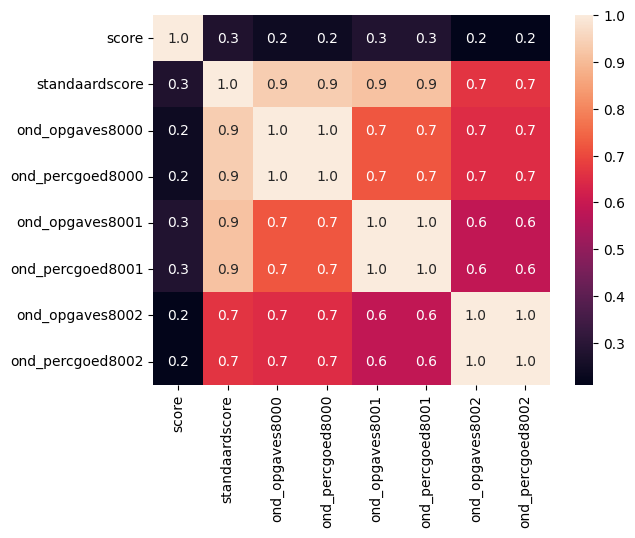

In [ ]:
correlations = dfcor.corr()
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

Text(0.5, 1.0, 'Scatter Plot of Score vs. Standaardscore')

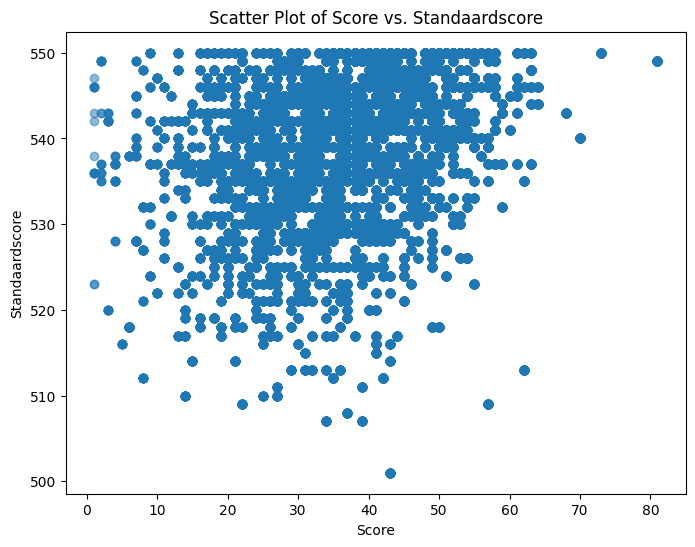

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(cito_fivedots['score'], cito_fivedots['standaardscore'], alpha=0.5)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Standaardscore')
plt.title('Scatter Plot of Score vs. Standaardscore')

it is just a stain nothing to see

In [ ]:
# Check for correlation
correlation = cito_fivedots['score'].corr(cito_fivedots['standaardscore'])

# Print the correlation coefficient
print(f"Correlation between 'score' and 'standaardscore': {correlation}")

Correlation between 'score' and 'standaardscore': 0.27722239964767925


even when printing the correlation there i barely anything 

Text(0.5, 1.0, 'Scatter Plot of Score vs. language score')

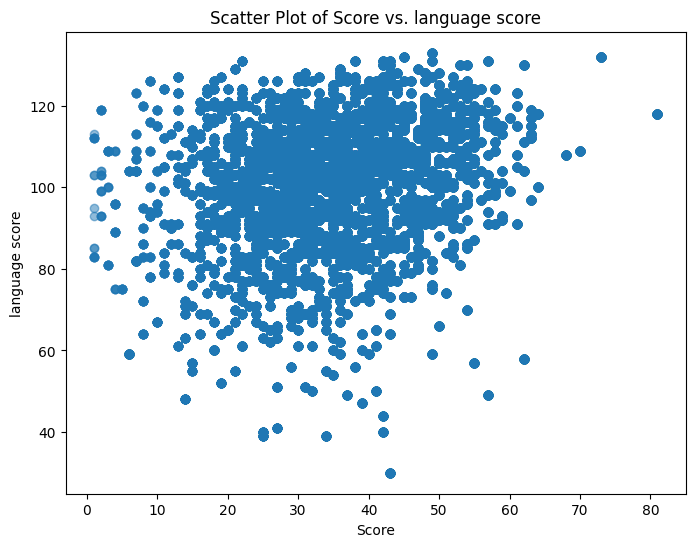

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(cito_fivedots['score'], cito_fivedots['ond_opgaves8000'], alpha=0.5)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('language score')
plt.title('Scatter Plot of Score vs. language score')

In [ ]:
# Check for correlation
correlation = cito_fivedots['score'].corr(cito_fivedots['ond_opgaves8000'])

# Print the correlation coefficient
print(f"Correlation between 'score' and 'language': {correlation}")

Correlation between 'score' and 'language': 0.2391286512085678


Text(0.5, 1.0, 'Scatter Plot of Score vs. math score')

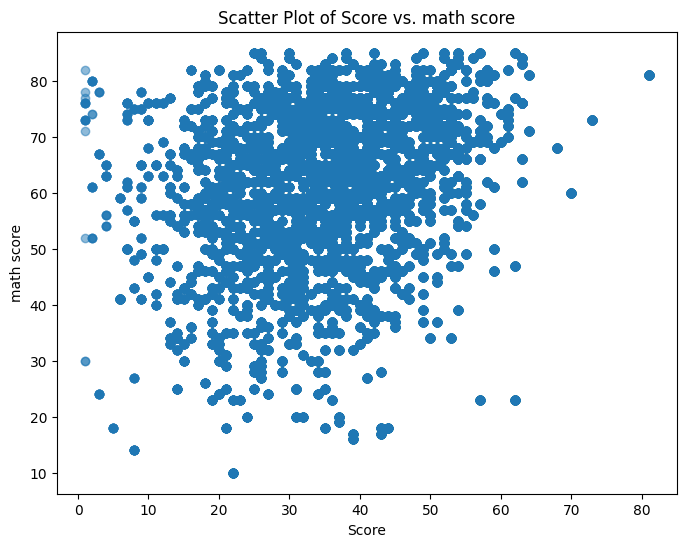

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(cito_fivedots['score'], cito_fivedots['ond_opgaves8001'], alpha=0.5)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('math score')
plt.title('Scatter Plot of Score vs. math score')

In [ ]:
# Check for correlation
correlation = cito_fivedots['score'].corr(cito_fivedots['ond_opgaves8001'])

# Print the correlation coefficient
print(f"Correlation between 'score' and 'math': {correlation}")

Correlation between 'score' and 'math': 0.28159922222566386


Text(0.5, 1.0, 'Scatter Plot of Score vs. score werelorientatie')

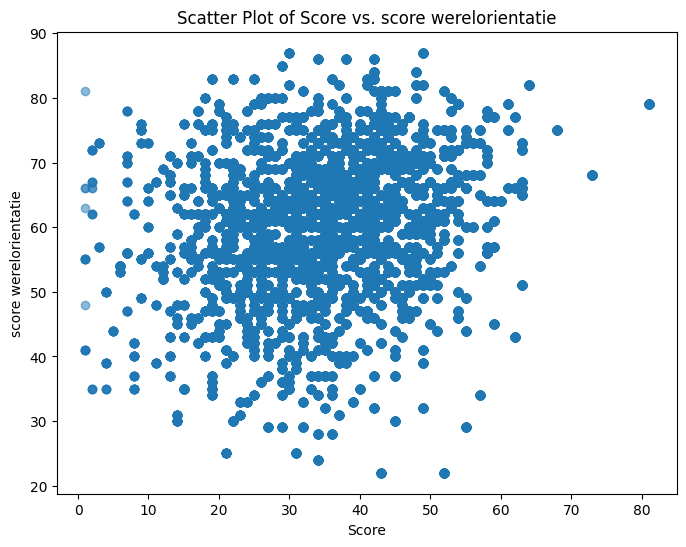

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(cito_fivedots['score'], cito_fivedots['ond_opgaves8002'], alpha=0.5)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('score werelorientatie')
plt.title('Scatter Plot of Score vs. score werelorientatie')

In [ ]:
# Check for correlation
correlation = cito_fivedots['score'].corr(cito_fivedots['ond_opgaves8002'])

# Print the correlation coefficient
print(f"Correlation between 'score' and 'wereldorientatie': {correlation}")

Correlation between 'score' and 'wereldorientatie': 0.21108318105178725


 from just the score and the features in the dataset i cnat fnd anything useful for a model. 

 I am going to try and group both the variables and see if i can find somethng that way. i am going to group the standard score on education level and the score of the five point probably in groups of 10 with the 10 best and 1 worst. 

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'standardscore' is a column in your DataFrame
cito_fivedots['highschool level'] = pd.cut(cito_fivedots['standaardscore'], bins=[float('-inf'), 535, 545, float('inf')],
                              labels=['vmbo', 'havo', 'vwo'], right=False, include_lowest=True)


In [ ]:
cito_fivedots

,timestamp,numbercl,patternsm,statuscl,timestampcl,timestampload,timestampsm,timeintest,score,schooljaar,standaardscore,ond_opgaves8000,ond_percgoed8000,ond_opgaves8001,ond_percgoed8001,ond_opgaves8002,ond_percgoed8002,highschool level
idll_vo3lv,,,,,,,,,,,,,,,,,,
8,2020-03-12 08:55:18,"1,4,2","1,1,0,1,0,0,0,0","1,1,1","1583999715121,1583999716133,1583999717352",1583999710357,8096,8096,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo
8,2020-03-12 08:55:27,"4,1,2,6","1,1,0,1,0,1,0,0","1,1,1,1","1583999721372,1583999723693,1583999724734,1583...",1583999718587,8651,16747,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo
8,2020-03-12 08:55:35,"4,1,2,6,8","1,1,0,1,0,1,0,1","1,1,1,1,1","1583999729695,1583999730516,1583999731319,1583...",1583999727361,7363,24110,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo
8,2020-03-12 08:55:42,"4,1,2,6,8,7","1,1,0,1,0,1,1,1","1,1,1,1,1,1","1583999736102,1583999737588,1583999738594,1583...",1583999734857,7325,31435,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo
8,2020-03-12 08:55:51,"4,1,2,6,8,7,5","1,1,0,1,1,1,1,1","1,1,1,1,1,1,1","1583999743936,1583999744749,1583999745544,1583...",1583999742350,9342,40777,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,2020-06-19 13:57:26,"5,5,6,7,2,1,3,4","1,1,1,1,0,1,1,0","1,0,1,1,1,1,1,1","1592567843671,1592567844225,1592567844688,1592...",1592567842807,3868,165492,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo
9737,2020-06-19 13:57:30,"6,8,4,1,2,3","1,1,1,1,0,1,0,1","1,1,1,1,1,1","1592567848223,1592567848530,1592567848951,1592...",1592567846981,3203,168695,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo
9737,2020-06-19 13:57:34,"1,4,5,7,2,3","1,1,1,1,1,0,1,0","1,1,1,1,1,1","1592567851631,1592567852033,1592567852321,1592...",1592567850775,3417,172112,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo


Text(0.5, 1.0, 'Scatter Plot of Score vs. classification')

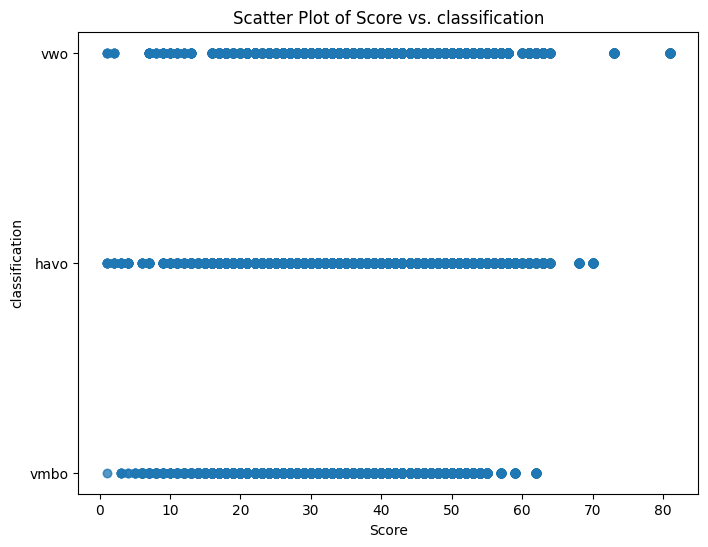

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(cito_fivedots['score'], cito_fivedots['highschool level'], alpha=0.5)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('classification')
plt.title('Scatter Plot of Score vs. classification')

In [ ]:
cito_fivedots['score'] = pd.to_numeric(cito_fivedots['score'], errors='coerce')

# Create a new column 'score_group' with bin labels
cito_fivedots['score_group'] = pd.qcut(cito_fivedots['score'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], labels=False, duplicates='drop')

# Rename the groups from 1 through 10
cito_fivedots['score_group'] = cito_fivedots['score_group'] + 1

In [ ]:
cito_fivedots


,timestamp,numbercl,patternsm,statuscl,timestampcl,timestampload,timestampsm,timeintest,score,schooljaar,standaardscore,ond_opgaves8000,ond_percgoed8000,ond_opgaves8001,ond_percgoed8001,ond_opgaves8002,ond_percgoed8002,highschool level,score_group
idll_vo3lv,,,,,,,,,,,,,,,,,,,
8,2020-03-12 08:55:18,"1,4,2","1,1,0,1,0,0,0,0","1,1,1","1583999715121,1583999716133,1583999717352",1583999710357,8096,8096,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:27,"4,1,2,6","1,1,0,1,0,1,0,0","1,1,1,1","1583999721372,1583999723693,1583999724734,1583...",1583999718587,8651,16747,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:35,"4,1,2,6,8","1,1,0,1,0,1,0,1","1,1,1,1,1","1583999729695,1583999730516,1583999731319,1583...",1583999727361,7363,24110,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:42,"4,1,2,6,8,7","1,1,0,1,0,1,1,1","1,1,1,1,1,1","1583999736102,1583999737588,1583999738594,1583...",1583999734857,7325,31435,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:51,"4,1,2,6,8,7,5","1,1,0,1,1,1,1,1","1,1,1,1,1,1,1","1583999743936,1583999744749,1583999745544,1583...",1583999742350,9342,40777,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,2020-06-19 13:57:26,"5,5,6,7,2,1,3,4","1,1,1,1,0,1,1,0","1,0,1,1,1,1,1,1","1592567843671,1592567844225,1592567844688,1592...",1592567842807,3868,165492,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo,4
9737,2020-06-19 13:57:30,"6,8,4,1,2,3","1,1,1,1,0,1,0,1","1,1,1,1,1,1","1592567848223,1592567848530,1592567848951,1592...",1592567846981,3203,168695,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo,4
9737,2020-06-19 13:57:34,"1,4,5,7,2,3","1,1,1,1,1,0,1,0","1,1,1,1,1,1","1592567851631,1592567852033,1592567852321,1592...",1592567850775,3417,172112,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo,4


Text(0.5, 1.0, 'Scatter Plot of Score vs. classification')

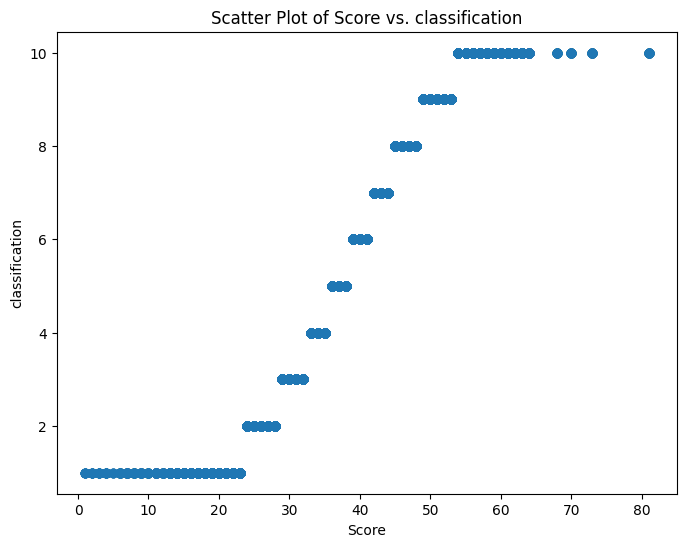

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(cito_fivedots['score'], cito_fivedots['score_group'], alpha=0.5)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('classification')
plt.title('Scatter Plot of Score vs. classification')

In [ ]:
# Group by 'score_group' and find the max and min values for each group
grouped_data = cito_fivedots.groupby('score_group')['score'].agg(['min', 'max'])
grouped_data

,min,max
score_group,,
1,1,23
2,24,28
3,29,32
4,33,35
5,36,38
6,39,41
7,42,44
8,45,48
9,49,53


In [ ]:

# Create a count plot using the bins
plt.figure(figsize=(12, 8))
sns.countplot(x='score', hue='highschool_level', data=cito_fivedots, palette='viridis')

# Adding labels and title
plt.xlabel('Score Intervals')
plt.ylabel('Count of Students')
plt.title('Count of Students in Score Intervals for Each High School Level')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cito_fivedots is your DataFrame with 'score' and 'highschool_level' columns

# Create bins for the 'score' column
score_bins = [0, 20, 40, 60, 80, 100]  # Define your bin edges
score_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']  # Labels for bins
cito_fivedots['score_bins'] = pd.cut(cito_fivedots['score'], bins=score_bins, labels=score_labels)

# Create a count plot using the bins
plt.figure(figsize=(12, 8))
sns.countplot(x='score_bins', hue='highschool_level', data=cito_fivedots, palette='viridis')

# Adding labels and title
plt.xlabel('Score Intervals')
plt.ylabel('Count of Students')
plt.title('Count of Students in Score Intervals for Each High School Level')

# Show the plot
plt.show()

ValueError: Could not interpret value `highschool_level` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

In [ ]:
cito_fivedots

,timestamp,numbercl,patternsm,statuscl,timestampcl,timestampload,timestampsm,timeintest,score,schooljaar,standaardscore,ond_opgaves8000,ond_percgoed8000,ond_opgaves8001,ond_percgoed8001,ond_opgaves8002,ond_percgoed8002,highschool level,score_group
idll_vo3lv,,,,,,,,,,,,,,,,,,,
8,2020-03-12 08:55:18,"1,4,2","1,1,0,1,0,0,0,0","1,1,1","1583999715121,1583999716133,1583999717352",1583999710357,8096,8096,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:27,"4,1,2,6","1,1,0,1,0,1,0,0","1,1,1,1","1583999721372,1583999723693,1583999724734,1583...",1583999718587,8651,16747,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:35,"4,1,2,6,8","1,1,0,1,0,1,0,1","1,1,1,1,1","1583999729695,1583999730516,1583999731319,1583...",1583999727361,7363,24110,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:42,"4,1,2,6,8,7","1,1,0,1,0,1,1,1","1,1,1,1,1,1","1583999736102,1583999737588,1583999738594,1583...",1583999734857,7325,31435,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
8,2020-03-12 08:55:51,"4,1,2,6,8,7,5","1,1,0,1,1,1,1,1","1,1,1,1,1,1,1","1583999743936,1583999744749,1583999745544,1583...",1583999742350,9342,40777,26,2016-2017,529,93,68.9,42,49.4,45.0,50.0,vmbo,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,2020-06-19 13:57:26,"5,5,6,7,2,1,3,4","1,1,1,1,0,1,1,0","1,0,1,1,1,1,1,1","1592567843671,1592567844225,1592567844688,1592...",1592567842807,3868,165492,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo,4
9737,2020-06-19 13:57:30,"6,8,4,1,2,3","1,1,1,1,0,1,0,1","1,1,1,1,1,1","1592567848223,1592567848530,1592567848951,1592...",1592567846981,3203,168695,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo,4
9737,2020-06-19 13:57:34,"1,4,5,7,2,3","1,1,1,1,1,0,1,0","1,1,1,1,1,1","1592567851631,1592567852033,1592567852321,1592...",1592567850775,3417,172112,33,2015-2016,543,107,79.3,70,82.4,65.0,72.2,havo,4
